In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
from sklearn.metrics import classification_report, confusion_matrix, explained_variance_score

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
df = pd.read_csv("Customers.csv", index_col="CustomerID")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  2000 non-null   object
 1   Age                     2000 non-null   int64 
 2   Annual Income ($)       2000 non-null   int64 
 3   Spending Score (1-100)  2000 non-null   int64 
 4   Profession              1965 non-null   object
 5   Work Experience         2000 non-null   int64 
 6   Family Size             2000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 125.0+ KB


In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,2000.0,48.9600,28.429747,0.0,25.0,48.0,73.00,99.0
Annual Income ($),2000.0,110731.8215,45739.536688,0.0,74572.0,110045.0,149092.75,189974.0
Spending Score (1-100),2000.0,50.9625,27.934661,0.0,28.0,50.0,75.00,100.0
Work Experience,2000.0,4.1025,3.922204,0.0,1.0,3.0,7.00,17.0
Family Size,2000.0,3.7685,1.970749,1.0,2.0,4.0,5.00,9.0


In [17]:
df["Gender"] = pd.get_dummies(df["Gender"], drop_first=True)

In [20]:
df["Profession"] = df["Profession"].replace(np.nan, "unknown")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  2000 non-null   uint8 
 1   Age                     2000 non-null   int64 
 2   Annual Income ($)       2000 non-null   int64 
 3   Spending Score (1-100)  2000 non-null   int64 
 4   Profession              2000 non-null   object
 5   Work Experience         2000 non-null   int64 
 6   Family Size             2000 non-null   int64 
dtypes: int64(5), object(1), uint8(1)
memory usage: 111.3+ KB


In [24]:
df["Profession"].nunique()

10

In [25]:
df["Profession"].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', 'unknown'],
      dtype=object)

<AxesSubplot:xlabel='Profession', ylabel='Annual Income ($)'>

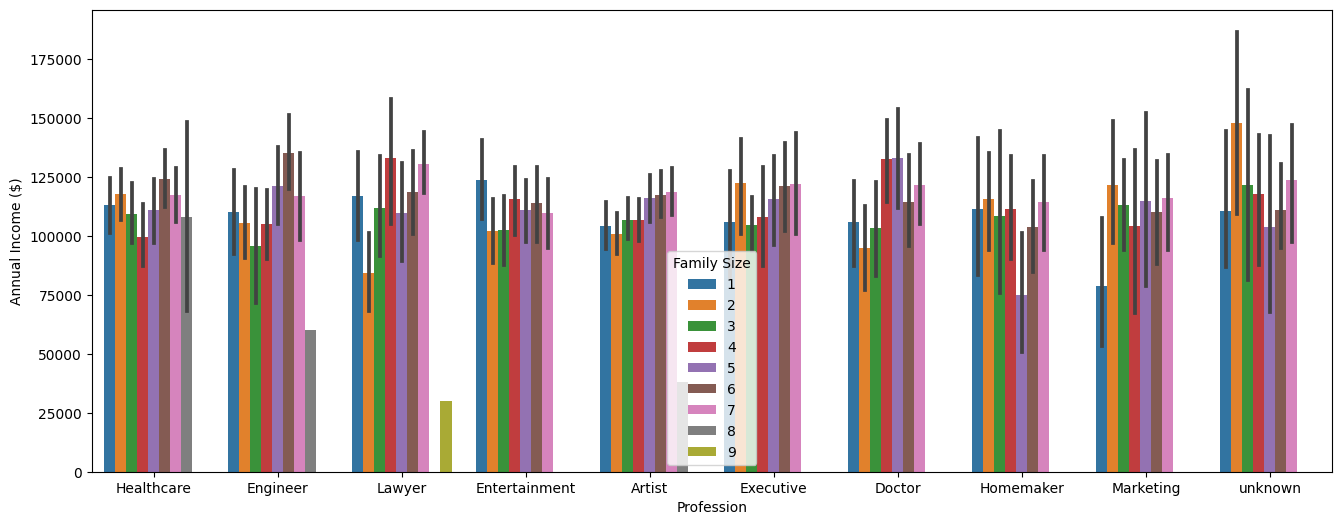

In [46]:
plt.figure(figsize=(16,6))
sns.barplot(x = "Profession", y = "Annual Income ($)", data = df, hue="Family Size")

In [42]:
df

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
CustomerID,,,,,,,
1,1,19,15000,39,Healthcare,1,4
2,1,21,35000,81,Engineer,3,3
3,0,20,86000,6,Engineer,1,1
4,0,23,59000,77,Lawyer,0,2
5,0,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...
1996,0,71,184387,40,Artist,8,7
1997,0,91,73158,32,Doctor,7,7
1998,1,87,90961,14,Healthcare,9,2


<AxesSubplot:>

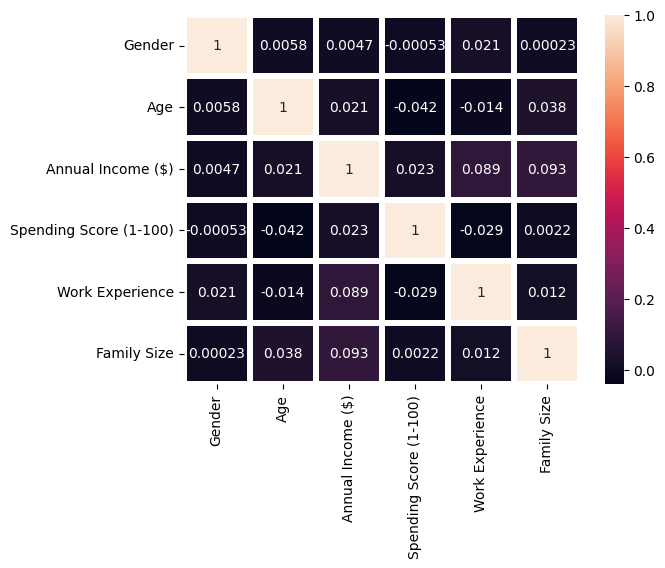

In [49]:
sns.heatmap(df.corr(), annot=True, linewidths=3, linecolor="w")

In [50]:
df.corrwith(df["Spending Score (1-100)"])

Gender                   -0.000528
Age                      -0.041798
Annual Income ($)         0.023299
Spending Score (1-100)    1.000000
Work Experience          -0.028948
Family Size               0.002232
dtype: float64

In [53]:
profDumm = pd.get_dummies(df["Profession"], drop_first=True)

In [54]:
df = pd.concat([df, profDumm], axis=1)

In [55]:
df.drop("Profession", axis=1, inplace=True)

## Model Creation

In [319]:
X= df.drop("Spending Score (1-100)", axis=1).values
y = df["Spending Score (1-100)"].values

In [320]:
from sklearn.model_selection import train_test_split

In [321]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [322]:
from sklearn.preprocessing import MinMaxScaler

In [323]:
scalar = MinMaxScaler()

In [239]:
X_train = scalar.fit_transform(X_train)

In [240]:
X_test = scalar.transform(X_test)

In [241]:
model = Sequential()
model.add(Dense(units=50, activation="relu"))

model.add(Dense(1, activation="relu"))

model.compile(loss = "mse", optimizer = Adam())

In [242]:
from tensorflow.keras.callbacks import EarlyStopping

In [243]:
stop = EarlyStopping(patience=600)

In [244]:
model.fit(X_train, y_train, epochs = 1000, validation_data = (X_test, y_test), callbacks = [stop])

Train on 1400 samples, validate on 600 samples
Epoch 1/1000
1400/1400 [==============================] - 0s 269us/sample - loss: 3284.3761 - val_loss: 3217.3777
Epoch 2/1000
1400/1400 [==============================] - 0s 52us/sample - loss: 3119.6599 - val_loss: 3015.0283
Epoch 3/1000
1400/1400 [==============================] - 0s 53us/sample - loss: 2873.3387 - val_loss: 2725.1136
Epoch 4/1000
1400/1400 [==============================] - 0s 52us/sample - loss: 2553.9489 - val_loss: 2382.9236
Epoch 5/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 2199.7181 - val_loss: 2027.4207
Epoch 6/1000
1400/1400 [==============================] - 0s 51us/sample - loss: 1848.7094 - val_loss: 1695.7738
Epoch 7/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 1537.3496 - val_loss: 1416.1627
Epoch 8/1000
1400/1400 [==============================] - 0s 51us/sample - loss: 1292.3228 - val_loss: 1203.6744
Epoch 9/1000
1400/1400 [========================

1400/1400 [==============================] - 0s 50us/sample - loss: 804.0458 - val_loss: 827.2609
Epoch 74/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 802.8465 - val_loss: 826.1687
Epoch 75/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 802.6883 - val_loss: 825.3493
Epoch 76/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 800.8504 - val_loss: 824.6004
Epoch 77/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 799.6984 - val_loss: 823.6956
Epoch 78/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 798.5769 - val_loss: 822.7201
Epoch 79/1000
1400/1400 [==============================] - 0s 49us/sample - loss: 797.6315 - val_loss: 822.0525
Epoch 80/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 796.6163 - val_loss: 821.2066
Epoch 81/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 795.6803 - val_loss: 820.3019
Epoch 

Epoch 146/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 765.7895 - val_loss: 796.7100
Epoch 147/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 766.1165 - val_loss: 796.4398
Epoch 148/1000
1400/1400 [==============================] - 0s 49us/sample - loss: 765.3062 - val_loss: 796.5406
Epoch 149/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 765.8820 - val_loss: 796.4947
Epoch 150/1000
1400/1400 [==============================] - 0s 49us/sample - loss: 765.2277 - val_loss: 796.4737
Epoch 151/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 765.3296 - val_loss: 796.7401
Epoch 152/1000
1400/1400 [==============================] - 0s 49us/sample - loss: 764.6945 - val_loss: 796.2759
Epoch 153/1000
1400/1400 [==============================] - 0s 49us/sample - loss: 765.3127 - val_loss: 796.2754
Epoch 154/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 764.8170 - va

1400/1400 [==============================] - 0s 52us/sample - loss: 757.8455 - val_loss: 793.5255
Epoch 219/1000
1400/1400 [==============================] - 0s 62us/sample - loss: 757.1236 - val_loss: 793.3632
Epoch 220/1000
1400/1400 [==============================] - 0s 57us/sample - loss: 757.1207 - val_loss: 793.1172
Epoch 221/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 757.4941 - val_loss: 793.2790
Epoch 222/1000
1400/1400 [==============================] - 0s 49us/sample - loss: 756.9051 - val_loss: 793.2246
Epoch 223/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 757.8698 - val_loss: 793.2421
Epoch 224/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 756.7827 - val_loss: 793.2038
Epoch 225/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 756.6760 - val_loss: 793.1558
Epoch 226/1000
1400/1400 [==============================] - 0s 49us/sample - loss: 756.4703 - val_loss: 793.160

1400/1400 [==============================] - 0s 50us/sample - loss: 750.1538 - val_loss: 794.1335
Epoch 291/1000
1400/1400 [==============================] - 0s 51us/sample - loss: 751.1584 - val_loss: 794.0847
Epoch 292/1000
1400/1400 [==============================] - 0s 51us/sample - loss: 750.7268 - val_loss: 794.4036
Epoch 293/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 749.6880 - val_loss: 794.0872
Epoch 294/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 750.2619 - val_loss: 794.4669
Epoch 295/1000
1400/1400 [==============================] - 0s 51us/sample - loss: 750.4840 - val_loss: 794.0179
Epoch 296/1000
1400/1400 [==============================] - 0s 49us/sample - loss: 749.4217 - val_loss: 794.4461
Epoch 297/1000
1400/1400 [==============================] - 0s 49us/sample - loss: 750.4481 - val_loss: 794.2636
Epoch 298/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 749.6567 - val_loss: 794.344

1400/1400 [==============================] - 0s 50us/sample - loss: 744.3171 - val_loss: 796.3211
Epoch 363/1000
1400/1400 [==============================] - 0s 51us/sample - loss: 744.6711 - val_loss: 796.2677
Epoch 364/1000
1400/1400 [==============================] - 0s 49us/sample - loss: 743.5212 - val_loss: 796.2364
Epoch 365/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 743.9813 - val_loss: 796.1768
Epoch 366/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 744.1894 - val_loss: 796.3569
Epoch 367/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 743.3534 - val_loss: 796.4111
Epoch 368/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 743.3502 - val_loss: 796.3855
Epoch 369/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 743.6673 - val_loss: 796.4808
Epoch 370/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 743.2589 - val_loss: 796.346

1400/1400 [==============================] - 0s 52us/sample - loss: 738.4849 - val_loss: 798.8687
Epoch 435/1000
1400/1400 [==============================] - 0s 54us/sample - loss: 738.3517 - val_loss: 799.1106
Epoch 436/1000
1400/1400 [==============================] - 0s 53us/sample - loss: 738.3033 - val_loss: 799.0411
Epoch 437/1000
1400/1400 [==============================] - 0s 54us/sample - loss: 738.3108 - val_loss: 799.2941
Epoch 438/1000
1400/1400 [==============================] - 0s 55us/sample - loss: 738.3532 - val_loss: 799.1734
Epoch 439/1000
1400/1400 [==============================] - 0s 53us/sample - loss: 737.8952 - val_loss: 799.3514
Epoch 440/1000
1400/1400 [==============================] - 0s 53us/sample - loss: 737.7483 - val_loss: 799.1598
Epoch 441/1000
1400/1400 [==============================] - 0s 51us/sample - loss: 737.6852 - val_loss: 799.3039
Epoch 442/1000
1400/1400 [==============================] - 0s 53us/sample - loss: 737.5487 - val_loss: 799.284

1400/1400 [==============================] - 0s 50us/sample - loss: 733.2053 - val_loss: 802.3514
Epoch 507/1000
1400/1400 [==============================] - 0s 51us/sample - loss: 734.3643 - val_loss: 802.3449
Epoch 508/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 732.9518 - val_loss: 802.2720
Epoch 509/1000
1400/1400 [==============================] - 0s 49us/sample - loss: 732.6936 - val_loss: 802.2434
Epoch 510/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 732.4656 - val_loss: 802.3021
Epoch 511/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 732.6357 - val_loss: 802.8093
Epoch 512/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 732.7260 - val_loss: 802.4057
Epoch 513/1000
1400/1400 [==============================] - 0s 49us/sample - loss: 732.7659 - val_loss: 802.0728
Epoch 514/1000
1400/1400 [==============================] - 0s 49us/sample - loss: 731.9091 - val_loss: 802.210

1400/1400 [==============================] - 0s 51us/sample - loss: 727.6001 - val_loss: 804.5718
Epoch 579/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 728.0500 - val_loss: 804.5993
Epoch 580/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 727.7234 - val_loss: 804.5781
Epoch 581/1000
1400/1400 [==============================] - 0s 49us/sample - loss: 727.4716 - val_loss: 804.5335
Epoch 582/1000
1400/1400 [==============================] - 0s 48us/sample - loss: 727.6403 - val_loss: 804.7977
Epoch 583/1000
1400/1400 [==============================] - 0s 48us/sample - loss: 727.3752 - val_loss: 804.9334
Epoch 584/1000
1400/1400 [==============================] - 0s 51us/sample - loss: 727.2160 - val_loss: 804.7124
Epoch 585/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 727.3842 - val_loss: 804.7442
Epoch 586/1000
1400/1400 [==============================] - 0s 49us/sample - loss: 727.0564 - val_loss: 804.737

1400/1400 [==============================] - 0s 50us/sample - loss: 723.0500 - val_loss: 807.6019
Epoch 651/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 722.6144 - val_loss: 807.6106
Epoch 652/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 722.4268 - val_loss: 807.8082
Epoch 653/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 722.0788 - val_loss: 807.3748
Epoch 654/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 722.2334 - val_loss: 807.4140
Epoch 655/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 722.6386 - val_loss: 807.8984
Epoch 656/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 722.4371 - val_loss: 807.4568
Epoch 657/1000
1400/1400 [==============================] - 0s 53us/sample - loss: 722.2527 - val_loss: 807.8999
Epoch 658/1000
1400/1400 [==============================] - 0s 54us/sample - loss: 721.8241 - val_loss: 808.070

1400/1400 [==============================] - 0s 51us/sample - loss: 719.2484 - val_loss: 810.6792
Epoch 723/1000
1400/1400 [==============================] - 0s 51us/sample - loss: 718.1229 - val_loss: 810.0537
Epoch 724/1000
1400/1400 [==============================] - 0s 49us/sample - loss: 718.3583 - val_loss: 810.1392
Epoch 725/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 718.6426 - val_loss: 810.4017
Epoch 726/1000
1400/1400 [==============================] - 0s 51us/sample - loss: 718.3685 - val_loss: 810.4123
Epoch 727/1000
1400/1400 [==============================] - 0s 49us/sample - loss: 717.8497 - val_loss: 810.2838
Epoch 728/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 718.7568 - val_loss: 810.2380
Epoch 729/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 717.9893 - val_loss: 810.4053
Epoch 730/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 718.0530 - val_loss: 810.186

1400/1400 [==============================] - 0s 51us/sample - loss: 714.8754 - val_loss: 812.2112
Epoch 795/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 715.0217 - val_loss: 811.9446
Epoch 796/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 715.3510 - val_loss: 812.2421
Epoch 797/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 714.7750 - val_loss: 812.3527
Epoch 798/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 715.1803 - val_loss: 812.3621
Epoch 799/1000
1400/1400 [==============================] - 0s 49us/sample - loss: 715.5145 - val_loss: 812.0953
Epoch 800/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 715.5300 - val_loss: 812.0510
Epoch 801/1000
1400/1400 [==============================] - 0s 50us/sample - loss: 714.9943 - val_loss: 812.3027
Epoch 802/1000
1400/1400 [==============================] - 0s 49us/sample - loss: 714.3156 - val_loss: 812.377

<AxesSubplot:>

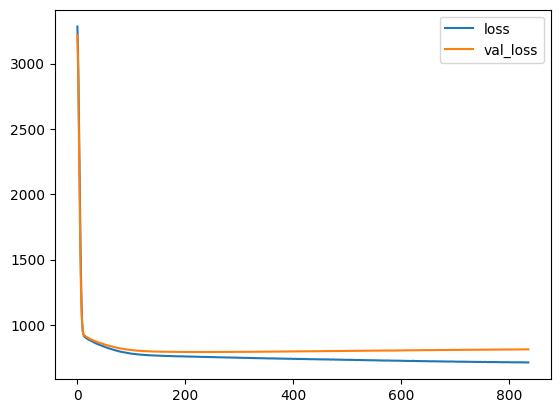

In [245]:
pd.DataFrame(model.history.history)[["loss", "val_loss"]].plot()

In [246]:
predictions = model.predict(X_test)

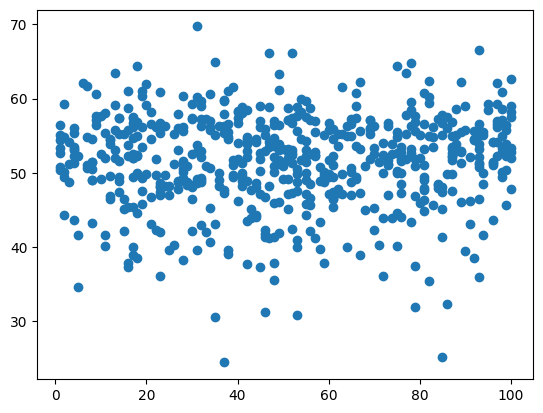

In [247]:
plt.scatter(y_test, predictions)

In [248]:
X_train.shape

(1400, 14)

In [329]:
encoder = Sequential()
encoder.add(Dense(units=12, activation="relu", input_shape = [14]))
encoder.add(Dense(units=8, activation="relu"))
encoder.add(Dense(units=6, activation="relu"))

In [330]:
decoder = Sequential()
decoder.add(Dense(units=14, activation="relu", input_shape = [6]))

In [331]:
autoEncoder = Sequential([encoder, decoder])

In [332]:
autoEncoder.compile(loss = "mse", optimiser = Adam())

In [333]:
autoEncoder.fit(X,X, epochs =200)

Train on 2000 samples
Epoch 1/200
2000/2000 [==============================] - 1s 290us/sample - loss: 1044649824.2560
Epoch 2/200
2000/2000 [==============================] - 0s 39us/sample - loss: 1025902349.3120
Epoch 3/200
2000/2000 [==============================] - 0s 37us/sample - loss: 1025187640.8320
Epoch 4/200
2000/2000 [==============================] - 0s 37us/sample - loss: 1025185614.8480
Epoch 5/200
2000/2000 [==============================] - 0s 37us/sample - loss: 1025186431.4880
Epoch 6/200
2000/2000 [==============================] - 0s 37us/sample - loss: 1025185609.7280
Epoch 7/200
2000/2000 [==============================] - 0s 39us/sample - loss: 1025185717.2480
Epoch 8/200
2000/2000 [==============================] - 0s 37us/sample - loss: 1025185627.1360
Epoch 9/200
2000/2000 [==============================] - 0s 37us/sample - loss: 1025186465.7920
Epoch 10/200
2000/2000 [==============================] - 0s 37us/sample - loss: 1025185608.7040
Epoch 11/200
200

2000/2000 [==============================] - 0s 39us/sample - loss: 1025185505.2800
Epoch 86/200
2000/2000 [==============================] - 0s 38us/sample - loss: 1025185492.9920
Epoch 87/200
2000/2000 [==============================] - 0s 38us/sample - loss: 1025185480.1920
Epoch 88/200
2000/2000 [==============================] - 0s 37us/sample - loss: 1025185538.0480
Epoch 89/200
2000/2000 [==============================] - 0s 37us/sample - loss: 1025185487.3600
Epoch 90/200
2000/2000 [==============================] - 0s 41us/sample - loss: 1025186167.8080
Epoch 91/200
2000/2000 [==============================] - 0s 37us/sample - loss: 1025185485.8240
Epoch 92/200
2000/2000 [==============================] - 0s 36us/sample - loss: 1025185468.4160
Epoch 93/200
2000/2000 [==============================] - 0s 37us/sample - loss: 1025187919.3600
Epoch 94/200
2000/2000 [==============================] - 0s 36us/sample - loss: 1025185498.1120
Epoch 95/200
2000/2000 [===================

2000/2000 [==============================] - 0s 36us/sample - loss: 1025185444.8640
Epoch 169/200
2000/2000 [==============================] - 0s 37us/sample - loss: 1025185447.9360
Epoch 170/200
2000/2000 [==============================] - 0s 37us/sample - loss: 1025186251.2640
Epoch 171/200
2000/2000 [==============================] - 0s 37us/sample - loss: 1025185440.2560
Epoch 172/200
2000/2000 [==============================] - 0s 37us/sample - loss: 1025185443.8400
Epoch 173/200
2000/2000 [==============================] - 0s 37us/sample - loss: 1025185844.2240
Epoch 174/200
2000/2000 [==============================] - 0s 37us/sample - loss: 1025185448.9600
Epoch 175/200
2000/2000 [==============================] - 0s 36us/sample - loss: 1025185430.5280
Epoch 176/200
2000/2000 [==============================] - 0s 36us/sample - loss: 1025185448.9600
Epoch 177/200
2000/2000 [==============================] - 0s 37us/sample - loss: 1025185683.4560
Epoch 178/200
2000/2000 [=========

<AxesSubplot:>

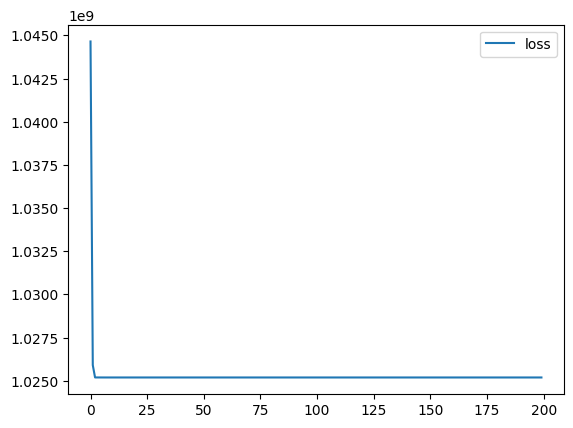

In [334]:
pd.DataFrame(autoEncoder.history.history).plot()

In [366]:
X.shape

(2000, 3)

In [335]:
encoderPredicitons = encoder.predict(X)

In [336]:
encoderPredicitons.shape

(2000, 6)

In [337]:
pd.DataFrame(encoderPredicitons)

,0,1,2,3,4,5
0,4.675557,4.990646,-0.0,-0.0,2.428885,0.0
1,4.675557,4.990646,-0.0,-0.0,2.428885,0.0
2,4.675557,4.990646,-0.0,-0.0,2.428885,0.0
3,4.675557,4.990646,-0.0,-0.0,2.428885,0.0
4,4.675557,4.990646,-0.0,-0.0,2.428885,0.0
...,...,...,...,...,...,...
1995,4.675557,4.990646,-0.0,-0.0,2.428885,0.0
1996,4.675557,4.990646,-0.0,-0.0,2.428885,0.0
1997,4.675557,4.990646,-0.0,-0.0,2.428885,0.0
1998,4.675557,4.990646,-0.0,-0.0,2.428885,0.0


In [338]:
ecoDF = pd.DataFrame(encoderPredicitons)[[0,1,4]]

In [339]:
ecoDF["target"] = y

In [340]:
ecoDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2000 non-null   float32
 1   1       2000 non-null   float32
 2   4       2000 non-null   float32
 3   target  2000 non-null   int64  
dtypes: float32(3), int64(1)
memory usage: 39.2 KB


In [341]:
X = ecoDF.drop("target", axis=1).values
y = ecoDF["target"].values

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [343]:
scalar = MinMaxScaler()

In [344]:
X_train = scalar.fit_transform(X_train)

In [345]:
X_test = scalar.transform(X_test)

In [346]:
model = Sequential()
model.add(Dense(units=150, activation="relu"))
model.add(Dense(units=150, activation="relu"))

model.add(Dense(units=50, activation="relu"))

model.add(Dense(units=50, activation="relu"))

model.add(Dense(units=50, activation="relu"))


model.add(Dense(1, activation="relu"))

model.compile(loss = "mse", optimizer = Adam())

In [347]:
stop = EarlyStopping(patience=100)

In [348]:
model.fit(X_train,y_train, epochs = 300, validation_data = (X_test, y_test), callbacks = [stop])

Train on 1400 samples, validate on 600 samples
Epoch 1/300
1400/1400 [==============================] - 1s 660us/sample - loss: 2729.7747 - val_loss: 854.0134
Epoch 2/300
1400/1400 [==============================] - 0s 292us/sample - loss: 796.3915 - val_loss: 807.2805
Epoch 3/300
1400/1400 [==============================] - 0s 302us/sample - loss: 795.4805 - val_loss: 787.5252
Epoch 4/300
1400/1400 [==============================] - 0s 267us/sample - loss: 791.5153 - val_loss: 808.4792
Epoch 5/300
1400/1400 [==============================] - 0s 277us/sample - loss: 793.7903 - val_loss: 791.1223
Epoch 6/300
1400/1400 [==============================] - 0s 276us/sample - loss: 787.4648 - val_loss: 791.4331
Epoch 7/300
1400/1400 [==============================] - 0s 262us/sample - loss: 793.0158 - val_loss: 785.2693
Epoch 8/300
1400/1400 [==============================] - 0s 281us/sample - loss: 781.2150 - val_loss: 786.3786
Epoch 9/300
1400/1400 [==============================] - 0s 296u

Epoch 74/300
1400/1400 [==============================] - 0s 257us/sample - loss: 785.5487 - val_loss: 793.4960
Epoch 75/300
1400/1400 [==============================] - 0s 252us/sample - loss: 777.6009 - val_loss: 799.0610
Epoch 76/300
1400/1400 [==============================] - 0s 257us/sample - loss: 787.2375 - val_loss: 788.8157
Epoch 77/300
1400/1400 [==============================] - 0s 259us/sample - loss: 778.2844 - val_loss: 789.7052
Epoch 78/300
1400/1400 [==============================] - 0s 265us/sample - loss: 786.6528 - val_loss: 807.2943
Epoch 79/300
1400/1400 [==============================] - 0s 259us/sample - loss: 784.3876 - val_loss: 804.4970
Epoch 80/300
1400/1400 [==============================] - 0s 265us/sample - loss: 777.4381 - val_loss: 786.4281
Epoch 81/300
1400/1400 [==============================] - 0s 256us/sample - loss: 777.3493 - val_loss: 786.3829
Epoch 82/300
1400/1400 [==============================] - 0s 259us/sample - loss: 787.3245 - val_loss: 7

1400/1400 [==============================] - 0s 259us/sample - loss: 780.2175 - val_loss: 796.7469
Epoch 147/300
1400/1400 [==============================] - 0s 258us/sample - loss: 782.8338 - val_loss: 803.4153
Epoch 148/300
1400/1400 [==============================] - 0s 259us/sample - loss: 778.7774 - val_loss: 794.6434
Epoch 149/300
1400/1400 [==============================] - 0s 262us/sample - loss: 777.8915 - val_loss: 795.9116
Epoch 150/300
1400/1400 [==============================] - 0s 326us/sample - loss: 786.1999 - val_loss: 801.9911


<AxesSubplot:>

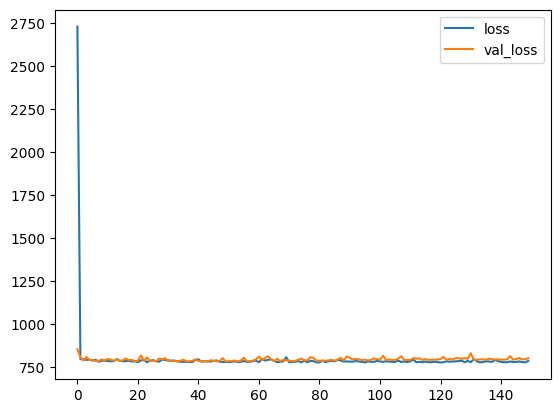

In [349]:
pd.DataFrame(model.history.history).plot()

In [350]:
predictions = model.predict(X_test)

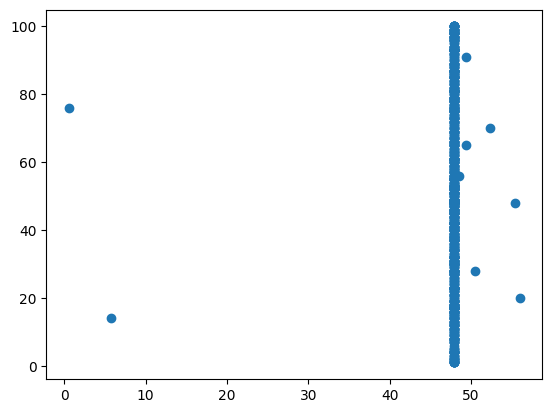

In [352]:
plt.scatter(predictions, y_test)

In [353]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [354]:
print(mean_absolute_error(predictions, y_test))

23.86132064094146


In [355]:
print(mean_squared_error(predictions, y_test))

801.9910655661216


In [356]:
print(np.sqrt(mean_squared_error(predictions, y_test)))

28.31944677365929


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

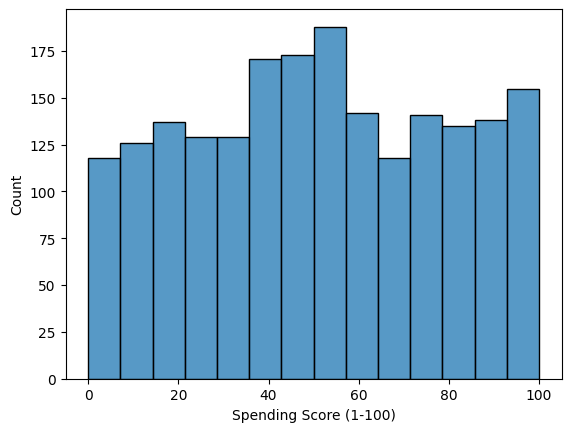

In [357]:
sns.histplot(df["Spending Score (1-100)"])

In [358]:
from random import randint
randomIndex = randint(0, len(df))
randomCustomer = df.drop("Spending Score (1-100)", axis=1).iloc[randomIndex]

In [360]:
X_train.shape

(1400, 3)

In [359]:
randomCustomer

Gender                   0
Age                     91
Annual Income ($)    60856
Work Experience          1
Family Size              6
Doctor                   0
Engineer                 0
Entertainment            0
Executive                0
Healthcare               0
Homemaker                0
Lawyer                   0
Marketing                0
unknown                  0
Name: 575, dtype: int64

In [368]:
encoder.predict(randomCustomer.values)

ValueError: Error when checking input: expected dense_127_input to have shape (14,) but got array with shape (1,)